In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import unicodedata
from risk_analytics_tools.RiskModel import RiskModel
%matplotlib inline

In [2]:
df = pd.read_excel('Encuesta .xlsx',encoding='utf8')


In [81]:
df['ID'] = df.index+1

In [3]:
df.shape

(70, 13)

In [4]:
df.head()

#materias cursadas  #materias reprobadas  Promedio Sexo Signo del zodiaco  \
0                  34                     1      8.17    H             Libra   
1                  37                     0      8.62    H               Leo   
2                  38                     0      9.80    M            Cancer   
3                  44                     1      8.00    M             Libra   
4                  37                     0      8.47    M           Geminis   

   Peso(kg)   Estatura(cm)  Materia favorita Segunda opción de carrera  \
0      110.0          172.0    Estadística 3                Telemática   
1       73.0          171.0   Algebra Lineal              Matemáticas    
2      104.0          171.0     Estadisica 3                   NInguna   
3       50.0          160.0    Estadística 1     Procesos Estocásticos   
4       65.0          164.0     Probabilidad                  Economía   

   #de hermanos Municipio de procedencia Color favorito   \
0           2.0               Naucalpan             Azul   
1           1.0              Iztapalapa             Rojo   
2           2.0               Ixtapaluca            Rojo   
3           1.0                Naucalpan            Azul   
4           2.0                Naucalpan            Azul   

   En una relación? 1=si,0=no  
0                         0.0  
1                         1.0  
2                         0.0  
3                         1.0  
4                         1.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 13 columns):
#materias cursadas            70 non-null int64
#materias reprobadas          70 non-null int64
Promedio                      69 non-null float64
Sexo                          69 non-null object
Signo del zodiaco             69 non-null object
Peso(kg)                      69 non-null float64
Estatura(cm)                  69 non-null float64
Materia favorita              69 non-null object
Segunda opción de carrera     69 non-null object
#de hermanos                  69 non-null float64
Municipio de procedencia      69 non-null object
Color favorito                68 non-null object
En una relación? 1=si,0=no    67 non-null float64
dtypes: float64(5), int64(2), object(6)
memory usage: 7.2+ KB


In [7]:
df.dropna(inplace=True)

In [14]:
var_cont = list(df.describe().columns)
var_disc = [v for v in df.columns if v not in var_cont]

In [89]:
def clean(x):
    try:
        x=x.replace(u'á','a')
        x=x.replace(u'é','e')
        x=x.replace(u'í','i')
        x=x.replace(u'ó','o')
        x=x.replace(u'ú','u')
        x=x.replace(u'Á','a')
        x=x.replace(u'É','e')
        x=x.replace(u'Í','i')
        x=x.replace(u'Ó','o')
        x=x.replace(u'Ú','u')
        x=x.replace(u'Ñ','n')
        x=x.replace(u'ñ','n')
        x=x.replace(' ','')
    except:
        print x
    return x.upper()

In [90]:
for v in var_disc:
    df[v]=df[v].map(clean)

In [44]:
for v in var_disc:
    print v
    print df[v].value_counts(normalize=True)
    print "\n"*2

Sexo
H    0.567164
M    0.432836
Name: Sexo, dtype: float64



Signo del zodiaco
VIRGO          0.149254
LIBRA          0.134328
CAPRICORNIO    0.119403
CANCER         0.119403
ARIES          0.089552
TAURO          0.089552
LEO            0.074627
PISCIS         0.074627
PICIS          0.044776
ESCORPION      0.044776
GEMINIS        0.029851
PISIS          0.014925
SAGITARIO      0.014925
Name: Signo del zodiaco, dtype: float64



Materia favorita
TSC                           0.089552
PROCESOSESTOCASTICOS          0.089552
ESTADISTICA1                  0.044776
ANALISISMATEMATICO            0.044776
ESTADISTICA                   0.044776
DERIVADOS                     0.044776
MATEMATICASFINANCIERAS        0.029851
ESTADISTICAI                  0.029851
PROBABILIDAD2                 0.029851
PROBABILIDAD                  0.029851
ECUACIONESDIFERENCIALES       0.029851
PENSIONES                     0.029851
CALCULO3                      0.029851
ESTADISTICA2                  0.029851
E

In [45]:
X = df[var_cont].copy()

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [49]:
sc = MinMaxScaler()
sc.fit(X)
Xs = pd.DataFrame(sc.transform(X),columns=var_cont)

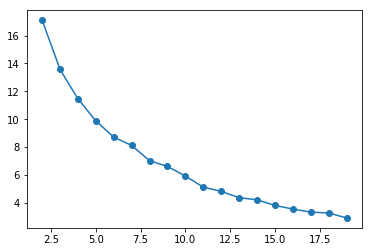

In [55]:
lst_in = []
for k in range(2,20):
    cl = KMeans(n_clusters=k)
    cl.fit(Xs)
    lst_in.append(cl.inertia_)
plt.plot(range(2,20),lst_in,marker='o')

In [58]:
cl = GaussianMixture(n_components=5)

In [59]:
cl.fit(Xs)
df['cl'] = cl.predict(Xs)

In [60]:
df.groupby('cl').mean()

#materias cursadas  #materias reprobadas  Promedio  Peso(kg)   \
cl                                                                  
0            37.054054              1.378378  8.325946  65.878378   
1            37.636364              0.272727  8.584545  74.181818   
2            35.909091              2.636364  7.703636  83.818182   
3            31.285714              4.285714  7.747143  52.285714   
4            34.000000              2.000000  7.000000  55.000000   

    Estatura(cm)   #de hermanos  En una relación? 1=si,0=no  
cl                                                           
0      153.164054      1.729730                         1.0  
1      170.090909      2.181818                         0.0  
2      173.727273      2.363636                         0.0  
3      138.694286      1.428571                         0.0  
4      156.000000      6.000000                         0.0

In [64]:
df.mean().T.to_frame().T

#materias cursadas  #materias reprobadas  Promedio  Peso(kg)   \
0           36.313433              1.716418   8.18597  68.604478   

   Estatura(cm)   #de hermanos  En una relación? 1=si,0=no        cl  
0     157.849701      1.940299                    0.552239  0.865672

In [65]:
df['n'] = 1

In [67]:
aux = df[['cl','Sexo','n']].copy()

aux = aux.pivot_table(index='cl',columns='Sexo',aggfunc='sum',values='n')

aux['T']=aux[['H','M']].sum(axis=1)
aux['M']/=aux['T']
aux['H']/=aux['T']

In [74]:
aux

Sexo         H         M     T
cl                            
0     0.540541  0.459459  37.0
1     0.636364  0.363636  11.0
2     0.818182  0.181818  11.0
3     0.285714  0.714286   7.0
4          NaN  1.000000   1.0

In [76]:
aux = df[['cl','Signo del zodiaco','n']].copy()

aux = aux.pivot_table(index='Signo del zodiaco',columns='cl',aggfunc='sum',values='n')


In [78]:
for c in range(5):
    aux[c]/=aux[c].sum()

In [79]:
aux

cl                        0         1         2         3    4
Signo del zodiaco                                             
ARIES              0.135135  0.090909       NaN       NaN  NaN
CANCER             0.108108  0.181818  0.181818       NaN  NaN
CAPRICORNIO        0.108108  0.272727       NaN  0.142857  NaN
ESCORPION               NaN  0.090909  0.181818       NaN  NaN
GEMINIS            0.027027       NaN  0.090909       NaN  NaN
LEO                0.054054       NaN  0.272727       NaN  NaN
LIBRA              0.162162  0.090909  0.090909  0.142857  NaN
PICIS              0.081081       NaN       NaN       NaN  NaN
PISCIS             0.135135       NaN       NaN       NaN  NaN
PISIS                   NaN       NaN       NaN  0.142857  NaN
SAGITARIO               NaN  0.090909       NaN       NaN  NaN
TAURO              0.081081  0.090909  0.181818       NaN  NaN
VIRGO              0.108108  0.090909       NaN  0.571429  1.0

In [83]:
var_cont

[u'#materias cursadas',
 u'#materias reprobadas',
 u'Promedio',
 u'Peso(kg) ',
 u'Estatura(cm) ',
 u'#de hermanos',
 u'En una relaci\xf3n? 1=si,0=no']

In [84]:
var_cont.pop()

u'En una relaci\xf3n? 1=si,0=no'

In [91]:
rm=RiskModel(df=df,id='ID',var_cont=var_cont,var_disc=var_disc,obj=u'En una relaci\xf3n? 1=si,0=no')

Normalizing discrete features...
Removing features without variance...
Discretizing continuous features...


/home/jose/code/risk_analytics_tools/RiskModel.py:18: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  data = None
/home/jose/code/risk_analytics_tools/RiskModel.py:260: RuntimeWarning: divide by zero encountered in log
  iv_data_frame['W'] = np.log(iv_data_frame['NE'] / iv_data_frame['E'])


best number of bins is 4 for feature #materias cursadas with iv 0.40
best number of bins is 3 for feature #materias reprobadas with iv 0.12
best number of bins is 7 for feature Promedio with iv 0.48
best number of bins is 3 for feature Peso(kg)  with iv 0.29
best number of bins is 9 for feature Estatura(cm)  with iv 0.12
best number of bins is 5 for feature #de hermanos with iv 0.48
best number of bins is 3 for feature #materias cursadas with iv 0.48
best number of bins is 3 for feature #materias reprobadas with iv 0.27
best number of bins is 4 for feature Promedio with iv 0.85
best number of bins is 4 for feature Peso(kg)  with iv 1.18
best number of bins is 4 for feature Estatura(cm)  with iv 0.88
best number of bins is 2 for feature #de hermanos with iv 0.40
Selecting best features...
Applying WOE transformation...


/home/jose/code/risk_analytics_tools/RiskModel.py:517: FutureWarning: 'Cop_Peso(kg) ' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  work_data_frame = work_data_frame.merge(iv_data_frame[[feat, 'W']], on=feat, how='left')
/home/jose/code/risk_analytics_tools/RiskModel.py:517: FutureWarning: 'Cop_Estatura(cm) ' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  work_data_frame = work_data_frame.merge(iv_data_frame[[feat, 'W']], on=feat, how='left')
/home/jose/code/risk_analytics_tools/RiskModel.py:517: FutureWarning: 'Cop_Promedio' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  work_data_frame = work_data_frame.merge(iv_data_frame[[feat, 'W']], on=feat, how='left')
/home/jose/code/risk_analytics_tools/RiskModel.py:517: FutureWarning: 'Ceq_#de hermanos' is bo

Fitting logistic model...
Applying credit scoring...
score has a range of 537 points
count     67.000000
mean     430.208955
std      145.670502
min      193.000000
25%      338.000000
50%      399.000000
75%      553.500000
max      730.000000
Name: score, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


/usr/lib64/python2.7/site-packages/sklearn/linear_model/logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/usr/lib64/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Performing graphical outputs...
Exporting scorecard to excel...


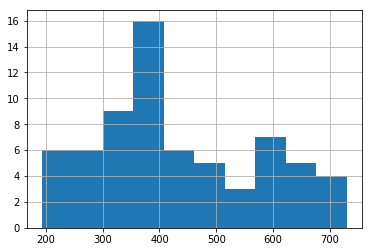

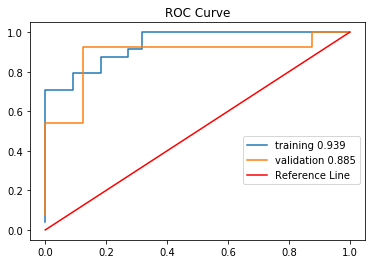

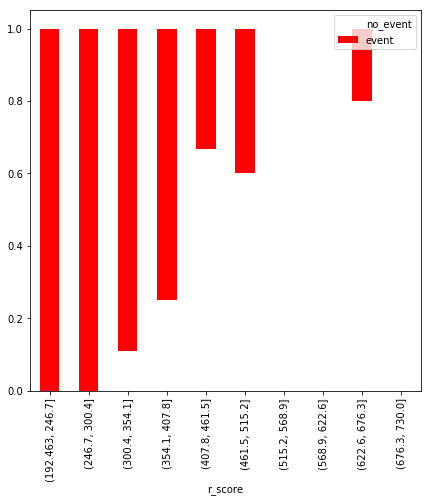

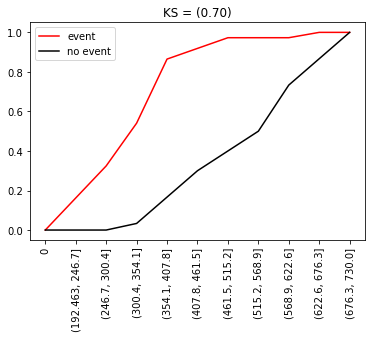

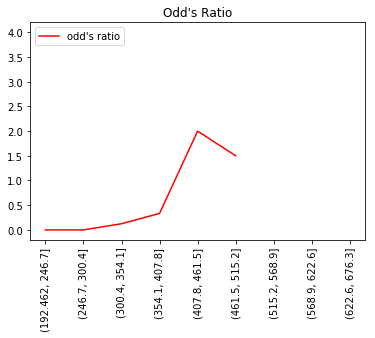

In [92]:
rm.auto_train(default_non_linear_use=False,best_features_threshold=0.01)

In [93]:
rm.ivr_best

feature        iv
9              Cop_Peso(kg)   1.178757
10         Cop_Estatura(cm)   0.884735
8               Cop_Promedio  0.847373
5           Ceq_#de hermanos  0.480453
6     Cop_#materias cursadas  0.479626
7   Cop_#materias reprobadas  0.271936
17           Color favorito   0.108927
14          Materia favorita  0.024619
12                      Sexo  0.014445